In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the 2D dataset csv file
data = pd.read_csv('sampledata_2D.csv', header=None, names=['x','y'])

In [3]:
# Inspecting the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
x    500 non-null float64
y    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
# First few rows of the dataset
data.loc[:,['x','y']].head(8)

,x,y
0,5.40230,-7.1490
1,-7.34510,15.2730
2,8.75070,-5.9696
3,-14.04800,17.6710
4,0.24255,6.8476
5,4.53560,-3.6764
6,0.62931,5.6476
7,5.12890,-4.0119


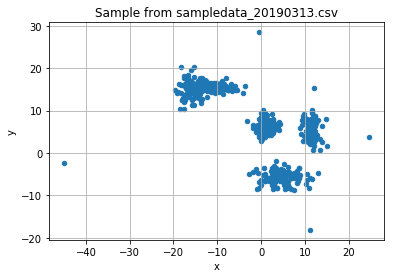

In [5]:
# plot the data points (Q1)
data.plot('x', 'y', kind='scatter')
plt.title('Sample from sampledata_20190313.csv')
plt.grid()
plt.savefig('2D_plot_sampledata_20190313.pdf', bbox_inches='tight')
plt.show()

In [6]:
# Clustering analysis: KMeans algorithm (Q2)
# (Note: train_test_split is imported to split the 
# sample into train/test dataset for cross-validation)

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# KMeans initialisation, specify the number of clusters as 4
KMmodel = KMeans(n_clusters=4)

# split the sample into train/test dataset
# Train/test ratio: 4:1
train, test = train_test_split(data, test_size=0.2, random_state=42)

points = train.iloc[:].values
KMmodel.fit(points)
labels = KMmodel.predict(data.iloc[:].values)
data['KMeans_labels'] = labels

In [7]:
# Inspecting the size of the resulting clusters

df_count = data.KMeans_labels.value_counts()
df_count = pd.DataFrame(df_count)
df_count.columns = ["number of data"]
df_count.sort_index(inplace=True)
df_count.index.name = "cluster label"
df_count

,number of data
cluster label,
0,110
1,192
2,91
3,107


In [10]:
# The clusters labels for train and test dataset separately

train_labels = KMmodel.predict(train)
test_labels = KMmodel.predict(test)
train['KMeans_labels'] = train_labels
test['KMeans_labels'] = test_labels

/Users/godfrey/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/godfrey/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# Find the mean (centriods) of each cluster (Q3)

centroids = KMmodel.cluster_centers_
df = pd.DataFrame(centroids)
df.columns = ['x_0', 'y_0']
df.index.name = 'cluster labels'
df

,x_0,y_0
cluster labels,,
0,4.705526,-5.858982
1,-13.204885,15.184254
2,11.646568,5.764125
3,1.071899,6.118891


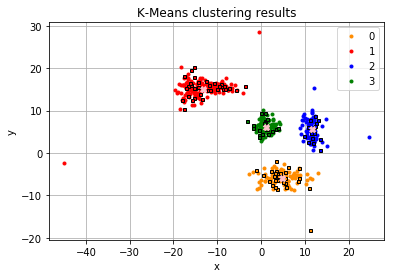

In [12]:
# K-means clustering results (Q2, Q5)

train_groups = train.groupby('KMeans_labels')
test_groups = test.groupby('KMeans_labels')

groups = zip(train_groups, test_groups)
colors = ["darkorange", "red", "blue", "green"]

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i in range(4):
    train_group = train_groups.get_group(i)
    ax.plot(train_group.x, train_group.y, marker='o', linestyle='', color=colors[i], label=i, ms=3)
ax.legend()
for i in range(4):    
    test_group = test_groups.get_group(i)    
    ax.plot(test_group.x, test_group.y, marker='s', linestyle='', color=colors[i], markeredgecolor="black", ms=3)

plt.plot(centroids[:,0], centroids[:,1], marker='X', color="pink", linestyle='')
plt.xlabel("x")
plt.ylabel("y")
plt.title('K-Means clustering results')
plt.grid()
plt.savefig('2D_plot_KMeans_2.pdf', bbox_inches='tight')
plt.show()

In [13]:
# Covariance matrix for each cluster (Q4)

data_by_group = data.groupby('KMeans_labels')
covariance = data_by_group.cov()
#corr_data = [convariance.iloc[2*i]['y'] for i in range(4)]
covariance_df = pd.DataFrame(covariance)
covariance_df

x         y
KMeans_labels                       
0             x   9.722362 -0.810570
              y  -0.810570  3.511195
1             x  18.785422  4.551088
              y   4.551088  4.807211
2             x   3.127399 -0.645064
              y  -0.645064  5.797291
3             x   1.905480  0.100096
              y   0.100096  2.035818

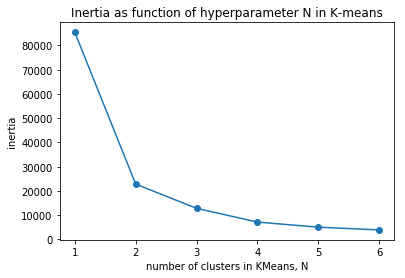

In [14]:
# Validation 1: Compare with the hyperparameter n_clusters in KMeans
# , i.e. number of clusters , using inertia (Elbow method) (Q5)

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(data.loc[:,['x','y']].values)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters in KMeans, N')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Inertia as function of hyperparameter N in K-means')
plt.savefig('elbow.pdf', bbox_inches='tight')
plt.show()

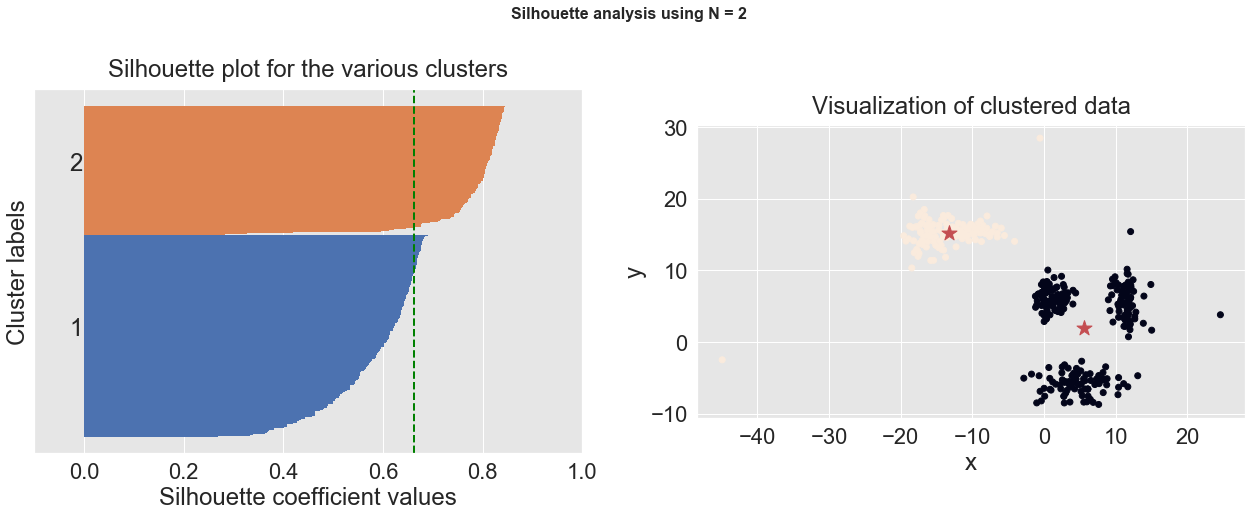

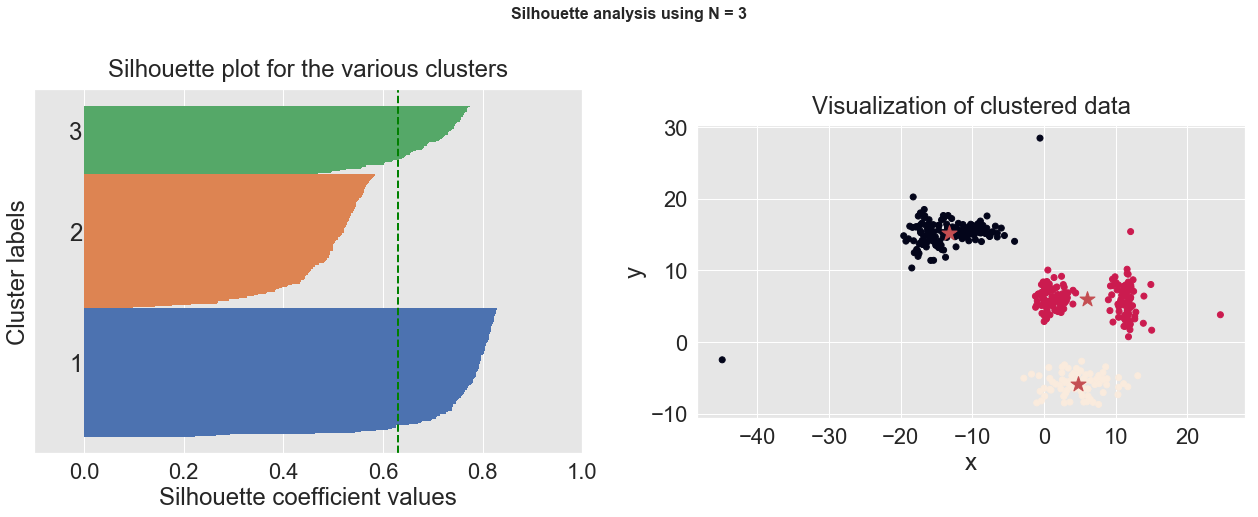

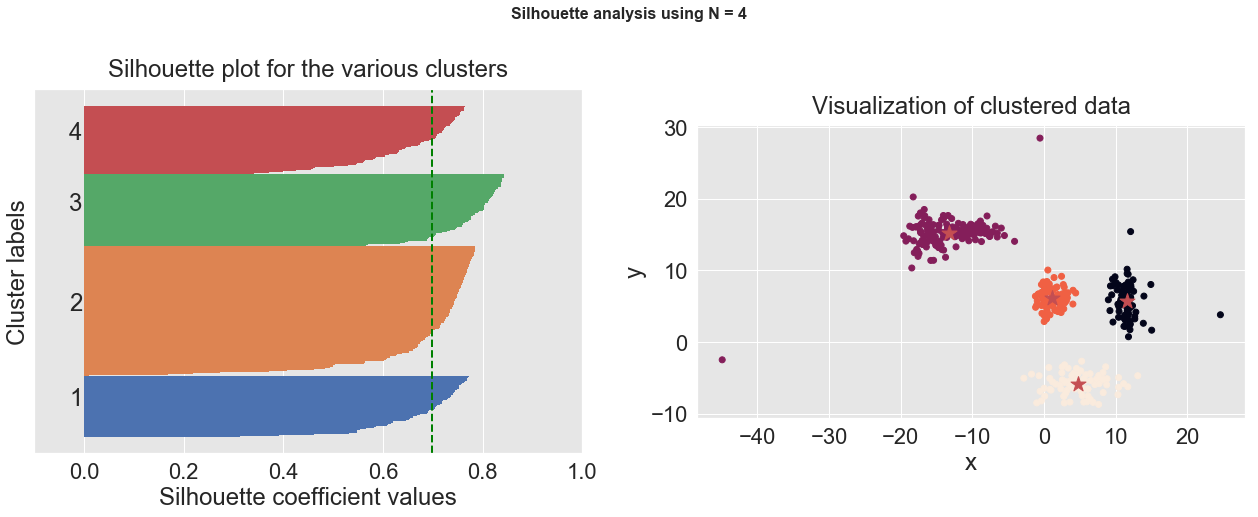

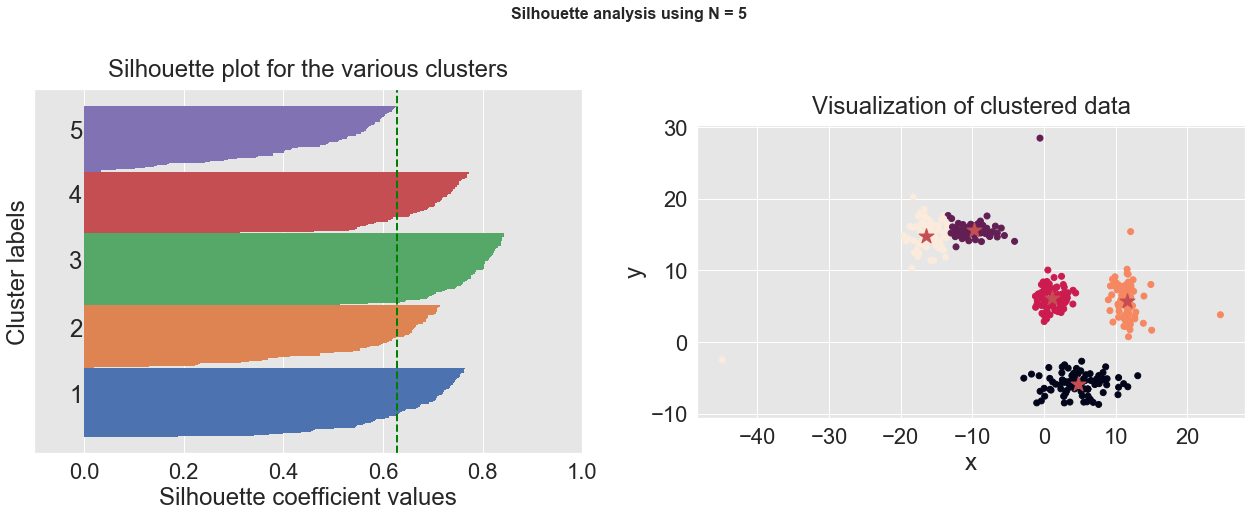

In [22]:
# Validation 2: Silhouette Analysis
# Silhouette analysis can be used to determine the degree of separation between clusters. 

from sklearn.metrics import silhouette_samples, silhouette_score

sns.set(font_scale=2)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# loop over number of clusters hyperparameter, from 2 to 5
for i, k in enumerate([2, 3, 4, 5]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(points)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(points, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(points[:, 0], points[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using N = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    plot_name = 'KMean_silhouette_N=' + str(k) +'.pdf'
    plt.savefig(plot_name, bbox_inches='tight')


/Users/godfrey/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/godfrey/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


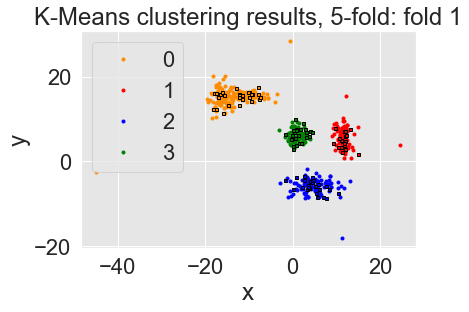

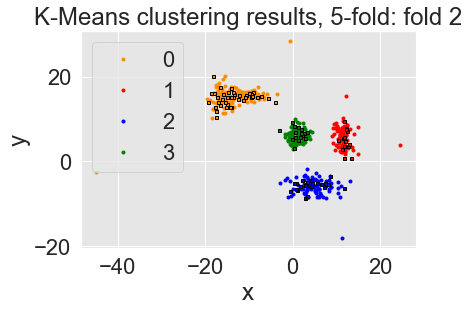

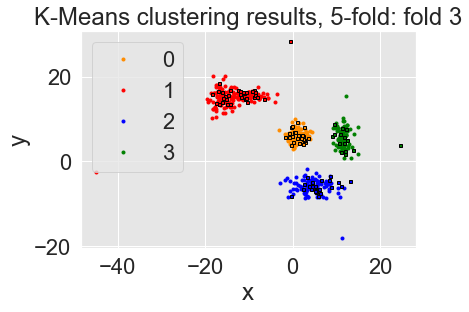

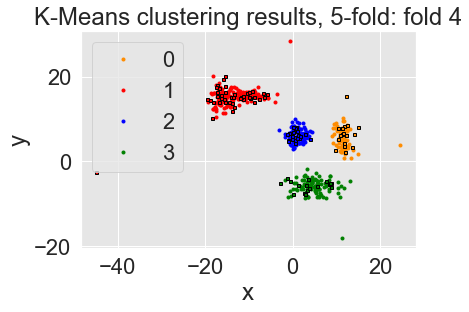

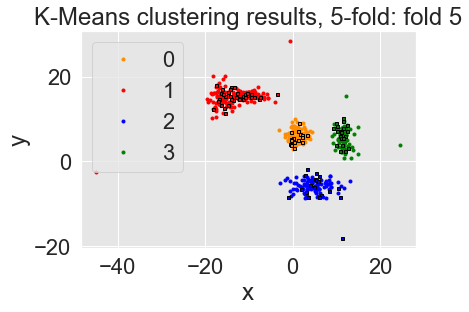

In [24]:
# Validation 3: K-fold (use 5-fold here) Cross-validation
from sklearn.model_selection import KFold

# Initialise the K-fold splits
kfold = KFold(5, True, 1)

data_train = []
data_test = []

# enumerate splits
for train, test in kfold.split(data):
    data_train.append(data.iloc[train])
    data_test.append(data.iloc[test])

colors = ["darkorange", "red", "blue", "green"]
    
# KMeans initialisation
KMmodel = KMeans(n_clusters=4)

for i in range(5):
    points = data_train[i]
    KMmodel.fit(points)
    labels_train = KMmodel.predict(points)
    points['label'] = labels_train
    labels_test = KMmodel.predict(data_test[i])
    points_test = data_test[i]
    points_test['label'] = labels_test
    data_kfold = pd.concat([points, points_test])

    # Group the data according to cluster label
    train = points.groupby('label')
    test = points_test.groupby('label')
    
    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    
    for j in range(4):
        train_group = train.get_group(j)
        ax.plot(train_group.x, train_group.y, marker='o', linestyle='', color=colors[j], label=j, ms=3)
        ax.legend()  
    for j in range(4):
        test_group = test.get_group(j)
        ax.plot(test_group.x, test_group.y, marker='s', linestyle='', color=colors[j], markeredgecolor="black", ms=3)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('K-Means clustering results, 5-fold: fold ' + str(i+1))
    filename = 'Kfold_' + str(i+1) + '.pdf'
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

col_0,0,1,2,3
row_0,,,,
0,91,2,15,9
1,0,86,0,5
2,4,2,74,17
3,5,10,11,69


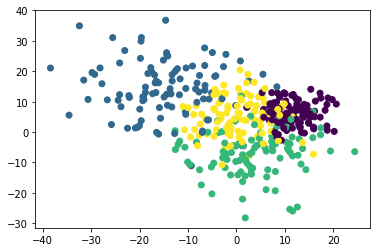

In [125]:
# Validation 2: Generate a set of simulated data points (2D Gaussian mixture models)
# and use the KMeans model to check the results
from sklearn.datasets.samples_generator import make_blobs

np.random.seed(42)
corr_list = [10*np.random.rand() for i in range(4)]

# Generate 4 sets of Gaussian blobs dataset
X_sim, y_sim_true = make_blobs(n_samples=400, centers=centroids,
                       cluster_std=corr_list, random_state=0)
plt.scatter(X_sim[:,0], X_sim[:,1], label=y_sim_true, c=y_sim_true)

# use the KMmeans model to predict the dataset labels and compare 
# with the true labels
y_sim_pred = KMmodel.predict(X_sim)

pd.crosstab(y_sim_pred, y_sim_true)

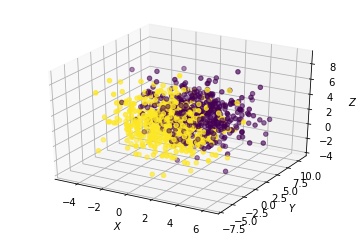

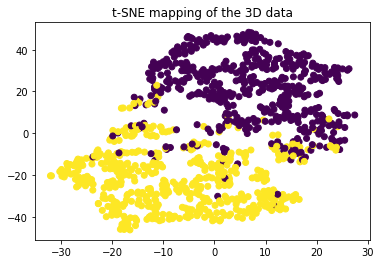

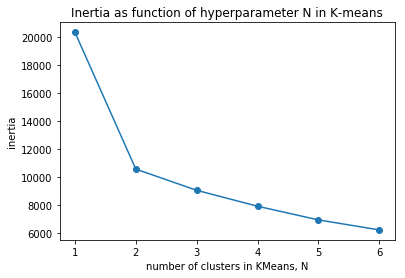

In [15]:
# Generate a sample of points from a mixture of 3D multivariate Gaussian distributions

def M3D_Gaussian_mixture(N, size, N_std):
    """
    Function that generate a sample of data from a 
    mixture of N 3D multivariate Gaussian distributions
    """
    from sklearn.datasets.samples_generator import make_blobs
    
    # Generate 4 sets of Gaussian blobs dataset
    # (isotropic Gaussian blobs)
    X_sim, y_sim_true = make_blobs(n_samples=size, n_features=3, centers=N,
                       cluster_std=N_std, random_state=0)
    
    return X_sim, y_sim_true

def M3D_clustering(M, size, cluster_std):
    """
    Function that perform K-means clustering analysis on a simulated
    mixture of M 3D multivariate Gaussian distributions and evalute
    the model performance
    
    """

    from mpl_toolkits.mplot3d import Axes3D

    X_3D_sim, y_3D_sim = M3D_Gaussian_mixture(M, size, cluster_std)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(X_3D_sim[:,0], X_3D_sim[:,1], X_3D_sim[:,2], label=y_3D_sim, c=y_3D_sim)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$Z$', rotation = 0)
    plt.savefig("2_3D_Gaussian.pdf", bbox_inches='tight')
    plt.show()

    from sklearn.manifold import TSNE

    # Create a TSNE instance: model
    model = TSNE(learning_rate=150)

    # Apply fit_transform to samples: tsne_features
    tsne_features = model.fit_transform(X_3D_sim)

    # Select the 0th feature: xs
    xs = tsne_features[:,0]
    # Select the 1st feature: ys
    ys = tsne_features[:,1]

    # Scatter plot, coloring by variety_numbers
    plt.scatter(xs,ys,c=y_3D_sim)
    plt.title('t-SNE mapping of the 3D data')
    plt.savefig("2_3D_Gaussian_tSNE.pdf", bbox_inches='tight')
    plt.show()
    
    # Clustering analysis: apply K-mean algorithm
    from sklearn.cluster import KMeans

    # KMeans initialisation
    KMmodel = KMeans(n_clusters=2)

    points = X_3D_sim
    KMmodel.fit(X_3D_sim)
    labels = KMmodel.predict(X_3D_sim)
    df_data = pd.DataFrame(X_3D_sim)
    df_data.columns=['x', 'y', 'z']
    df_data['KMeans_labels'] = labels
    df_data['true_labels'] = y_3D_sim
    
    # Centroids, cluster size, covariance matrix
    df_count = df_data.KMeans_labels.value_counts()
    df_count = pd.DataFrame(df_count)
    df_count.columns = ["number of data"]
    df_count.sort_index(inplace=True)
    df_count.index.name = "cluster label"
    
    centroids = KMmodel.cluster_centers_
    df_centriods = pd.DataFrame(centroids)
    df_centriods.columns = ['x_0', 'y_0', 'z_0']
    df_centriods.index.name = 'cluster labels'
  
    df_data_by_group = df_data.drop(columns=['true_labels']).groupby('KMeans_labels')
    covariance = df_data_by_group.cov()
    covariance_df = pd.DataFrame(covariance)
    
    # Evaluation, elbow method
    ks = range(1, 7)
    inertias = []

    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(X_3D_sim)
        inertias.append(model.inertia_)
    
    # Plot ks vs inertias
    plt.plot(ks, inertias, '-o')
    plt.xlabel('number of clusters in KMeans, N')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.title('Inertia as function of hyperparameter N in K-means')
    plt.savefig('elbow_2_3D_Gaussian.pdf', bbox_inches='tight')
    plt.show()
    
    # K-fold Cross-validation
    
    #print(df_data)
    
    return df_data, df_count, df_centriods, covariance_df
    
df1, df2, df3, df4 = M3D_clustering(2,1000,2)

In [19]:
df4

x         y         z
KMeans_labels                                
0             x  3.773730 -0.068305  0.126430
              y -0.068305  3.412390  0.058466
              z  0.126430  0.058466  3.578485
1             x  3.377151  0.198938 -0.289019
              y  0.198938  3.121541  0.039996
              z -0.289019  0.039996  3.917282

In [20]:
df1['KMeans_labels'] = df1.KMeans_labels.map({1:0, 0:1})
pd.crosstab(df1.true_labels, df1.KMeans_labels)

KMeans_labels,0,1
true_labels,,
0,469,31
1,31,469


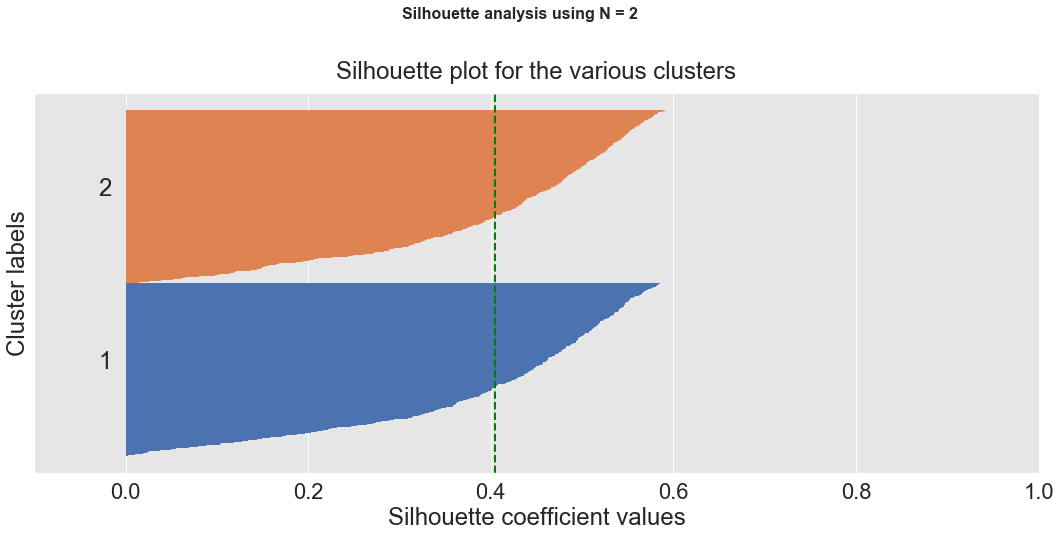

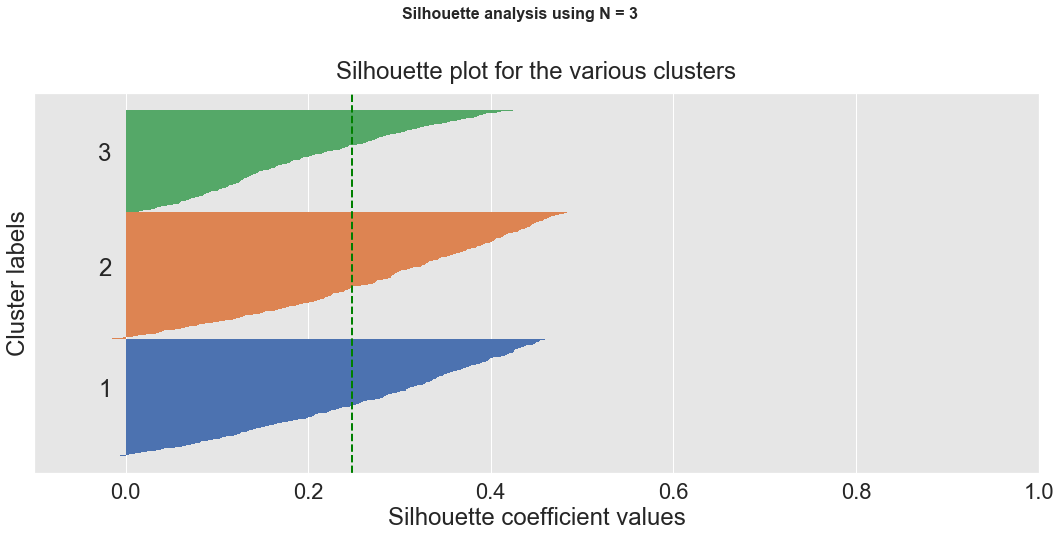

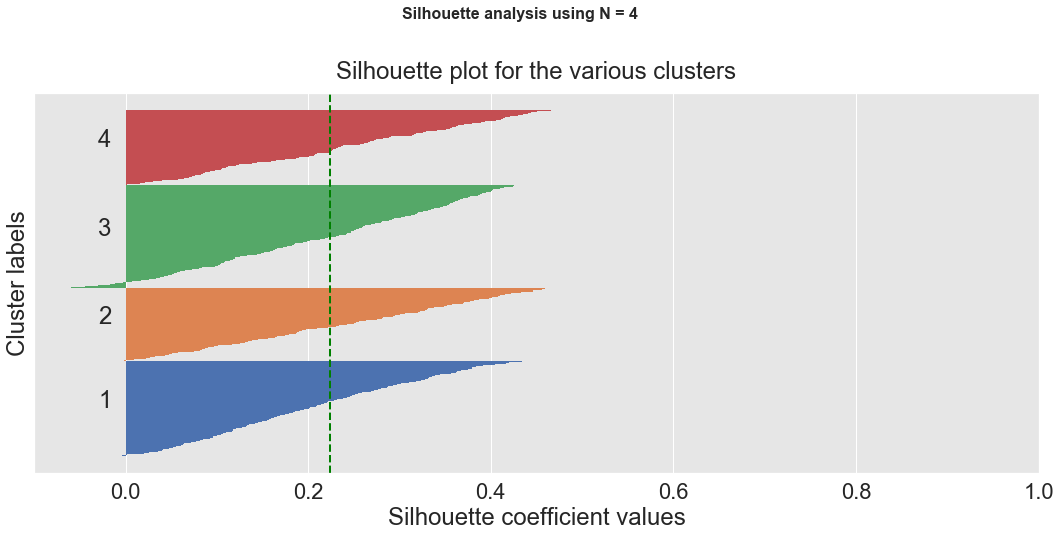

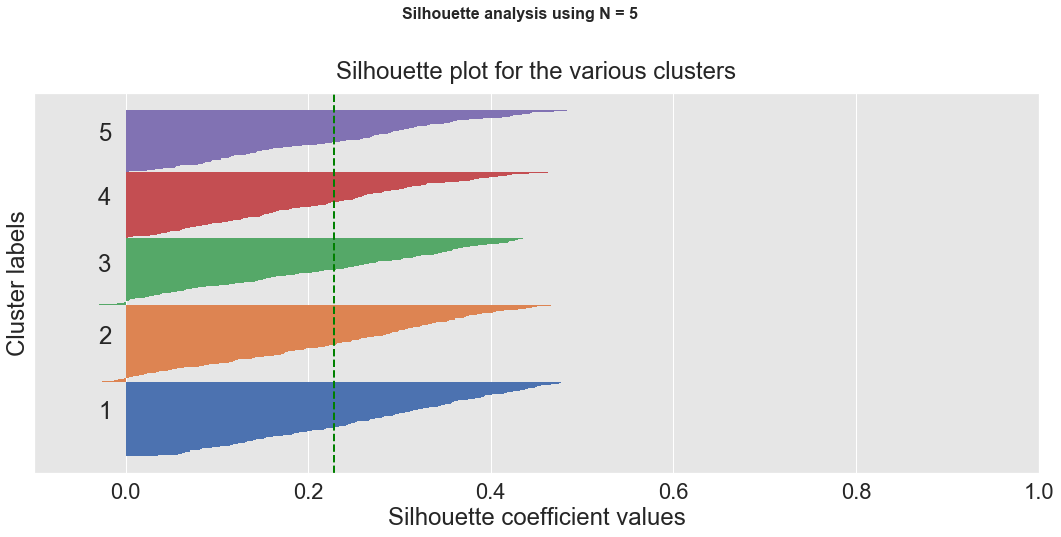

In [28]:
# Validation 2: Silhouette Analysis
# Silhouette analysis can be used to determine the degree of separation between clusters. 

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

sns.set(font_scale=2)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

points_3D = df1.loc[:,['x','y','z']].values

# loop over number of clusters hyperparameter, from 2 to 5
for i, k in enumerate([2, 3, 4, 5]):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(points_3D)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(points_3D, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    #from mpl_toolkits.mplot3d import Axes3D
    
    #ax2 = plt.axes(projection='3d')
    
    #ax2.scatter(points_3D[:, 0], points_3D[:, 1], points_3D[:, 1], c=labels)
    #ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='r', s=250)
    #ax2.set_xlabel('$X$')
    #ax2.set_ylabel('$Y$')
    #ax2.zaxis.set_rotate_label(False) 
    #ax2.set_zlabel('$Z$', rotation = 0)
    #ax2.set_title('Visualization of clustered data', y=1.02)
    #ax2.set_aspect('equal')
    #plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using N = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    plot_name = 'KMean_silhouette_3D_N=' + str(k) +'.pdf'
    plt.savefig(plot_name, bbox_inches='tight')


In [ ]:
def clustering_evaluation(df, M):
    # Elbow method
    # Run the Kmeans algorithm and get the index of data points clusters
    sse = []
    list_k = list(range(1, M+3))
    points = df.loc[:,['x', 'y']].values

    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit(points)
        sse.append(km.inertia_)

    # Plot sse against k
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse, '-o')
    plt.xlabel('Number of clusters, N')
    plt.ylabel('Inertia');
    plt.title('Inertia as function of hyperparameter N in K-means')
    plt.savefig('elbow.pdf', bbox_inches='tight')
    
    # Validation 2: Silhouette Analysis
# Silhouette analysis can be used to determine the degree of separation between clusters. 

from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4, 5]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(points)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(points, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(points[:, 0], points[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    plot_name = 'KMean_silhouette_N=' + str(k) +'.pdf'
    plt.savefig(plot_name, bbox_inches='tight')

In [84]:
df4

x         y         z
KMeans_labels                                
0             x  1.000000  0.023016 -0.047525
              y  0.023016  1.000000  0.004645
              z -0.047525  0.004645  1.000000
1             x  1.000000 -0.062020  0.015289
              y -0.062020  1.000000 -0.026184
              z  0.015289 -0.026184  1.000000

In [70]:
pd.crosstab(df1.true_labels, df1.KMeans_labels)

KMeans_labels,0,1
true_labels,,
0,0,500
1,500,0


In [9]:
# Two 3D Gaussian distributions, analysis

from sklearn.cluster import KMeans

# KMeans initialisation
KMmodel = KMeans(n_clusters=2)

points_3d = X_3D_sim
KMmodel.fit(points_3d)
labels = KMmodel.predict(points_3d)
data_2_3d = pd.DataFrame(points_3d)
data_2_3d.columns = ['x', 'y', 'z']
data_2_3d['true label'] = y_3D_sim
data_2_3d['K-means label'] = labels
pd.crosstab(data_2_3d['true label'], data_2_3d['K-means label'])

K-means label,0,1
true label,,
0,500,0
1,0,500


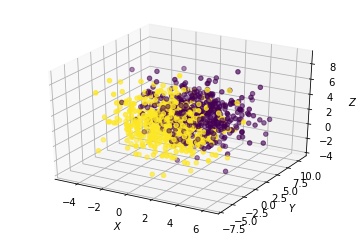

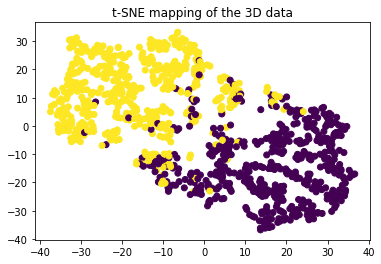

In [13]:
# Function that generate a mixutre of N 3-dim Gaussian distributions dataset

def N3D_Gaussian_mixture(N, size, N_std):
    from sklearn.datasets.samples_generator import make_blobs
    
    # Generate 4 sets of Gaussian blobs dataset
    X_sim, y_sim_true = make_blobs(n_samples=size, n_features=3, centers=N,
                       cluster_std=N_std, random_state=0)
    
    return X_sim, y_sim_true

from mpl_toolkits.mplot3d import Axes3D

X_3D_sim, y_3D_sim = N3D_Gaussian_mixture(2, 1000, 2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_3D_sim[:,0], X_3D_sim[:,1], X_3D_sim[:,2], label=y_3D_sim, c=y_3D_sim)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$Z$', rotation = 0)
plt.savefig('2_3D_Gaussian_plot.pdf', bbox_inches='tight')
plt.show()

from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=150)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_3D_sim)

# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_3D_sim)
plt.title('t-SNE mapping of the 3D data')
plt.savefig('2_3D_Gaussian_tsne.pdf', bbox_inches='tight')
plt.show()

In [12]:
# Two 3D Gaussian distributions, analysis

from sklearn.cluster import KMeans

# KMeans initialisation
KMmodel = KMeans(n_clusters=2)

points_3d = X_3D_sim
KMmodel.fit(points_3d)
labels = KMmodel.predict(points_3d)
data_2_3d = pd.DataFrame(points_3d)
data_2_3d.columns = ['x', 'y', 'z']
data_2_3d['true label'] = y_3D_sim
data_2_3d['K-means label'] = labels
pd.crosstab(data_2_3d['true label'], data_2_3d['K-means label'])

K-means label,0,1
true label,,
0,31,469
1,469,31


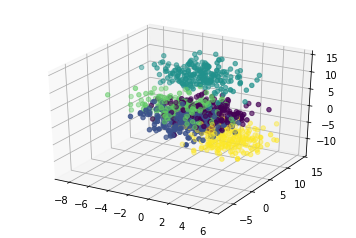

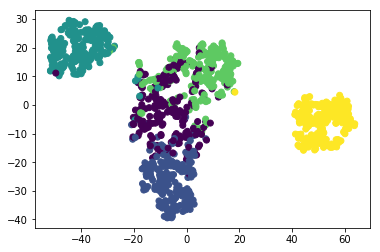

In [140]:
# Simulated 3D data samples from 5 Gaussian distributions (5 clusters)

X_3D_sim, y_3D_sim = N3D_Gaussian_mixture(5, 1000, 2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_3D_sim[:,0], X_3D_sim[:,1], X_3D_sim[:,2], label=y_3D_sim, c=y_3D_sim)
plt.show()

from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=150)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_3D_sim)

# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_3D_sim)
plt.show()

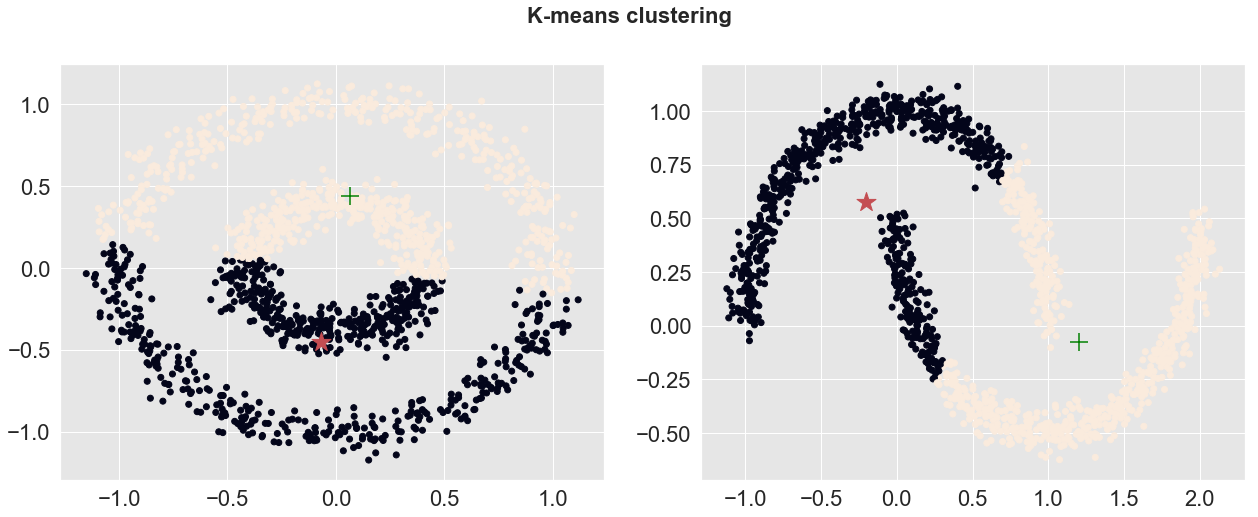

/Users/godfrey/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/godfrey/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


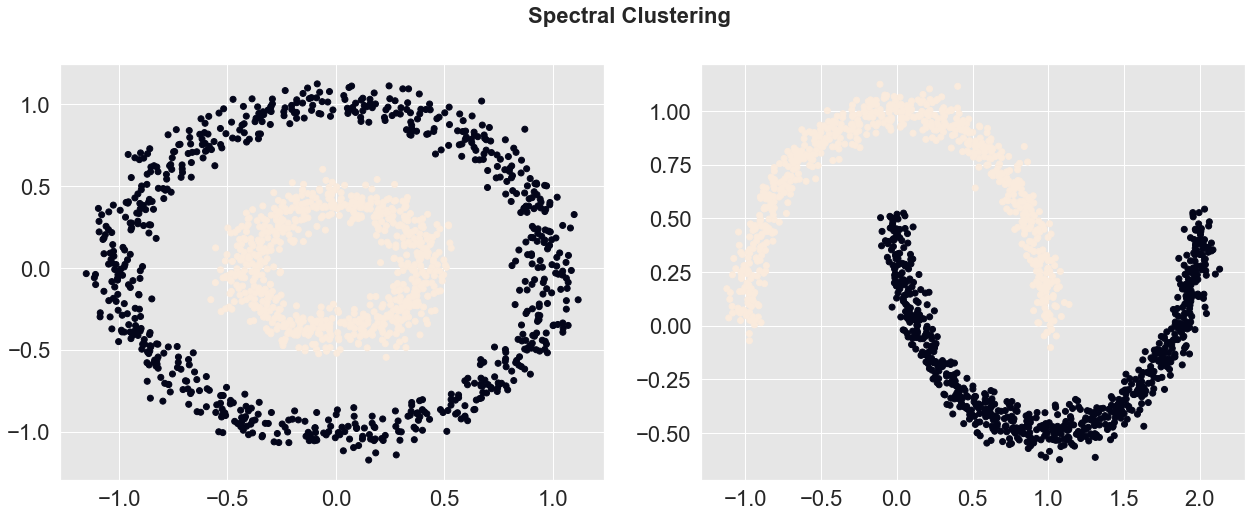

In [36]:
# Examples where K-means would fail:
# Clustering of sample from a uniform/radial distribution 
# simulated radial distribution datasets using 
# make_circles, make_moons in sklearn.datasets

from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles, make_moons

# Circular rings
X1 = make_circles(factor=0.4, noise=0.07, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters=2)
    model.fit(X[0])
    labels = model.predict(X[0])
    centroids = model.cluster_centers_

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('K-means clustering', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()
plt.savefig('radial_K-means.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    sp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    sp.fit(X[0])
    labels = sp.labels_
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
plt.suptitle('Spectral Clustering', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()
plt.savefig('radial_spectral.pdf', bbox_inches='tight')
plt.show()